In [3]:
import torch
from torch_geometric.data import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

In [2]:
card_df = pd.read_csv("data/버스카드 이력_20250301-20250331/버스카드 이력_20250301-20250331.csv", encoding='cp949')

card_df.columns = ['적재_년월일', '시리얼_순번', '승차_거래_일자', '카드_승차_시간', '교통_수단_코드',
       '환승_횟수', '교통_사업자_코드', '카드_차량_코드', '사용자_구분_코드', '운행_출발_시간',
       '카드_운행_시간', '카드_승차_정류장_ID', '카드_하차_정류장_ID', '하차_거래_일자',
       '하차_거래_시간', '이용자_수', '승차_금액', '하차_금액', '승차_정산_일자',
       '하차_정산_일자', '카드_노선_코드']

In [3]:
line_stop_df = pd.read_csv("data/세종특별자치시_노선별_정류장현황_20241125.csv", encoding='cp949')
line_df = pd.read_csv("data/세종특별자치시_노선정보_20241125.csv", encoding='cp949')
stop_df = pd.read_csv("data/세종특별자치시_정류장정보_20241125.csv", encoding='cp949')

In [4]:
card_df

,적재_년월일,시리얼_순번,승차_거래_일자,카드_승차_시간,교통_수단_코드,환승_횟수,교통_사업자_코드,카드_차량_코드,사용자_구분_코드,운행_출발_시간,...,카드_승차_정류장_ID,카드_하차_정류장_ID,하차_거래_일자,하차_거래_시간,이용자_수,승차_금액,하차_금액,승차_정산_일자,하차_정산_일자,카드_노선_코드
0,20250302,NaN,20250301,62413,828,0,160010001,160735568,1,20250301,...,6800153,NaN,NaN,NaN,1,1400,0,20250301,NaN,60600414
1,20250302,NaN,20250301,62425,828,0,160010001,160735569,1,20250301,...,6800405,NaN,NaN,NaN,1,1400,0,20250301,NaN,60600415
2,20250302,NaN,20250301,51732,830,0,160210001,160701354,1,20250301,...,6800965,NaN,NaN,NaN,1,1700,0,20250301,NaN,60600126
3,20250302,NaN,20250301,52958,830,0,160210001,160701352,1,20250301,...,6800952,NaN,NaN,NaN,1,2000,0,20250301,NaN,60600089
4,20250302,NaN,20250301,54901,828,0,160010001,160735644,4,20250301,...,6802357,NaN,NaN,NaN,1,1100,0,20250301,NaN,60600424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009675,20250302,NaN,20250301,220533,828,0,160010001,160735587,1,20250301,...,6801179,NaN,NaN,NaN,1,1700,0,20250301,NaN,60600342
2009676,20250302,NaN,20250301,221454,828,0,160010001,160735650,1,20250301,...,6800031,NaN,NaN,NaN,1,1400,0,20250301,NaN,60600346
2009677,20250302,NaN,20250301,224657,828,1,160010001,160735502,4,20250301,...,6800001,NaN,NaN,NaN,1,0,0,20250301,NaN,60600134
2009678,20250302,NaN,20250301,231834,830,1,160210001,160701021,1,20250301,...,6800945,NaN,NaN,NaN,1,0,0,20250301,NaN,60600206


In [5]:
line_stop_df

,교통수단,노선번호,노선명,정류장ID,정류장명,정류장수,정류장순서,정류장 X좌표,정류장 Y좌표
0,세종시(일반),540,540번(장군면사무소~장군면사무소),6800133,장군면사무소,3,1,127.205310,36.497140
1,세종시(일반),540,540번(장군면사무소~장군면사무소),6800134,하봉리마을회관,3,2,127.190320,36.495930
2,세종시(일반),540,540번(장군면사무소~장군면사무소),6800124,장군면사무소,3,3,127.205110,36.496840
3,세종시(일반),550,550번(산성동종점~조치원역),6801913,산성동종점,62,1,127.123870,36.460140
4,세종시(일반),550,550번(산성동종점~조치원역),6800655,"산성시장(옥룡동,공주고방면)",62,2,127.124697,36.458732
...,...,...,...,...,...,...,...,...,...
3634,세종시(일반),DRT8,DRT8번(장군면사무소~김종서장군묘),6801894,김종서장군묘,2,2,127.211222,36.520242
3635,세종시(일반),DRT9,DRT9번(장군면사무소~김종서장군묘),6800124,장군면사무소,2,1,127.205110,36.496840
3636,세종시(일반),DRT9,DRT9번(장군면사무소~김종서장군묘),6801894,김종서장군묘,2,2,127.211222,36.520242
3637,세종시(일반),DRT10,DRT10번(장군면사무소~김종서장군묘),6800124,장군면사무소,2,1,127.205110,36.496840


In [6]:
len(line_stop_df['노선번호'].unique())

144

In [7]:
line_df

,일련번호,정산지역코드,노선ID,교통수단코드,노선명,노선번호,노선정류장수,노선거리,출발정류장ID,도착정류장ID
0,1,26001,60600079,828,801번(민석아파트입구~세종고속시외버스터미널),801,55,55,6800415,6801288
1,2,26001,60600198,828,340번(세종고속시외버스터미널~조치원버스터미널),340,29,29,6801289,6800075
2,3,26001,60600199,828,340-1번(조치원버스터미널~세종고속시외버스터미널),340-1,28,28,6800075,6801288
3,4,26001,60600133,829,655-1번(세종고속시외버스터미널~충남대학교),655-1,43,43,6802397,6801359
4,5,26001,60600129,828,550-1번(조치원역~산성동종점),550-1,64,64,6800001,6800654
...,...,...,...,...,...,...,...,...,...,...
139,140,26001,60600296,828,910-1번(병천고등학교~조치원역),910-1,46,46,6800926,6805516
140,141,26001,60600282,828,31번(조치원버스터미널~부강면),31,27,27,6805515,6806321
141,142,26001,60600287,828,33-1번(부강면~조치원버스터미널),Jan-33,42,42,6801983,6805516
142,143,26001,60600365,828,54번(장군면사무소~장군면사무소),54,11,11,6800133,6800133


In [8]:
len(line_df['노선번호'].unique())

144

In [9]:
stop_df

,일련번호,정산지역코드,정류장ID,버스정류장명,정류장 X좌표,정류장 Y좌표
0,1,26001,6800001,조치원역,127.297130,36.600990
1,2,26001,6800002,조치원전통시장,127.298190,36.599942
2,3,26001,6800003,죽림리,127.298900,36.590750
3,4,26001,6800004,번암리,127.298410,36.588400
4,5,26001,6800005,번암아파트,127.295820,36.585770
...,...,...,...,...,...,...
1990,1991,26001,6905612,부강산업단지입구,127.362262,36.500532
1991,1992,26001,6905614,부강산업단지입구,127.361837,36.500897
1992,1993,26001,6905615,부강산업단지,127.364923,36.498367
1993,1994,26001,6905698,문화체육관광부,127.266467,36.496745


In [10]:
# 1. 정류장 데이터의 ID를 기반으로 중복되지 않게 정류장 노드 인덱스 생성
station_id_to_idx = {station_id: idx for idx, station_id in enumerate(stop_df['정류장ID'])}

# 2. 노드 특성 텐서 생성 - 모든 정류장에 대해
node_features = torch.tensor(stop_df[['정류장 X좌표', '정류장 Y좌표']].values, dtype=torch.float)

# 3. 각 노선별로 그래프 생성
route_graphs = {}

for route_name, route_group in line_stop_df.groupby('노선번호'):
    # 정류장 순서대로 정렬
    sorted_stops = route_group.sort_values('정류장순서')
    
    # 해당 노선의 엣지(정류장 연결) 데이터 리스트
    edge_list = []
    
    # 연속된 정류장 간 엣지 생성
    for i in range(len(sorted_stops) - 1):
        from_stop = sorted_stops.iloc[i]['정류장ID']
        to_stop = sorted_stops.iloc[i + 1]['정류장ID']
        
        # 정류장 ID가 알려진 노드 집합에 있는지 확인
        if from_stop in station_id_to_idx and to_stop in station_id_to_idx:
            from_idx = station_id_to_idx[from_stop]
            to_idx = station_id_to_idx[to_stop]
            edge_list.append([from_idx, to_idx])
    
    # 해당 노선에 엣지가 있는 경우에만 그래프 생성
    if edge_list:
        # 엣지 인덱스 텐서 생성
        edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
        
        # 그래프 객체 생성
        route_graph = Data(x=node_features, edge_index=edge_index)
        
        # 결과 딕셔너리에 저장
        route_graphs[route_name] = route_graph

        print(f"{route_name}번 버스에 해당하는 엣지가 지나가는 노드 수 = {route_graph.num_edges}")


01월 16일번 버스에 해당하는 엣지가 지나가는 노드 수 = 31
01월 17일번 버스에 해당하는 엣지가 지나가는 노드 수 = 22
01월 31일번 버스에 해당하는 엣지가 지나가는 노드 수 = 27
1000번 버스에 해당하는 엣지가 지나가는 노드 수 = 28
1000-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 28
1004번 버스에 해당하는 엣지가 지나가는 노드 수 = 37
1004-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 36
1005번 버스에 해당하는 엣지가 지나가는 노드 수 = 18
1005-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 18
11번 버스에 해당하는 엣지가 지나가는 노드 수 = 29
12번 버스에 해당하는 엣지가 지나가는 노드 수 = 29
13번 버스에 해당하는 엣지가 지나가는 노드 수 = 27
16번 버스에 해당하는 엣지가 지나가는 노드 수 = 31
17번 버스에 해당하는 엣지가 지나가는 노드 수 = 22
201번 버스에 해당하는 엣지가 지나가는 노드 수 = 23
201-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 25
202번 버스에 해당하는 엣지가 지나가는 노드 수 = 19
202-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 17
203번 버스에 해당하는 엣지가 지나가는 노드 수 = 30
203-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 29
204번 버스에 해당하는 엣지가 지나가는 노드 수 = 21
204-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 22
204-3번 버스에 해당하는 엣지가 지나가는 노드 수 = 18
204-4번 버스에 해당하는 엣지가 지나가는 노드 수 = 18
221번 버스에 해당하는 엣지가 지나가는 노드 수 = 31
221-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 32
222번 버스에 해당하는 엣지가 지나가는 노드 수 = 40
222-1번 버스에 해당하는 엣지가 지나가는 노드 수 = 38
300번 버스에 해당하는 엣지가 지나가는 노드 수 = 41
300-1번 버

In [11]:
# 4. 노선별 그래프 시각화 함수
def visualize_route_graph(route_name, graph):
    G = to_networkx(graph, to_undirected=True)
    
    # 노드 위치 설정 (실제 지리적 좌표 사용)
    pos = {}
    for station_id, idx in station_id_to_idx.items():
        station_row = stop_df[stop_df['정류장ID'] == station_id]
        if not station_row.empty:
            # X, Y 좌표로 위치 설정
            pos[idx] = (station_row['정류장 X좌표'].values[0], station_row['정류장 Y좌표'].values[0])
    
    plt.figure(figsize=(12, 10))
    
    # 모든 노드를 작게 회색으로 표시
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='lightgray')
    
    # 해당 노선의 실제 사용되는 노드 찾기
    route_nodes = set()
    for edge in graph.edge_index.t().tolist():
        route_nodes.add(edge[0])
        route_nodes.add(edge[1])
    
    # 해당 노선의 노드를 크게 파란색으로 강조
    nx.draw_networkx_nodes(G, pos, 
                          nodelist=list(route_nodes), 
                          node_size=30, 
                          node_color='blue')

    print('노드 개수:', len(route_nodes))
    
    # 해당 노선의 엣지 표시
    nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.7, edge_color='red')
    
    # 그래프 제목 및 레이아웃 설정
    plt.title(f'{route_name} Bus', fontsize=15)
    plt.axis('off')
    plt.show()

노드 개수: 14


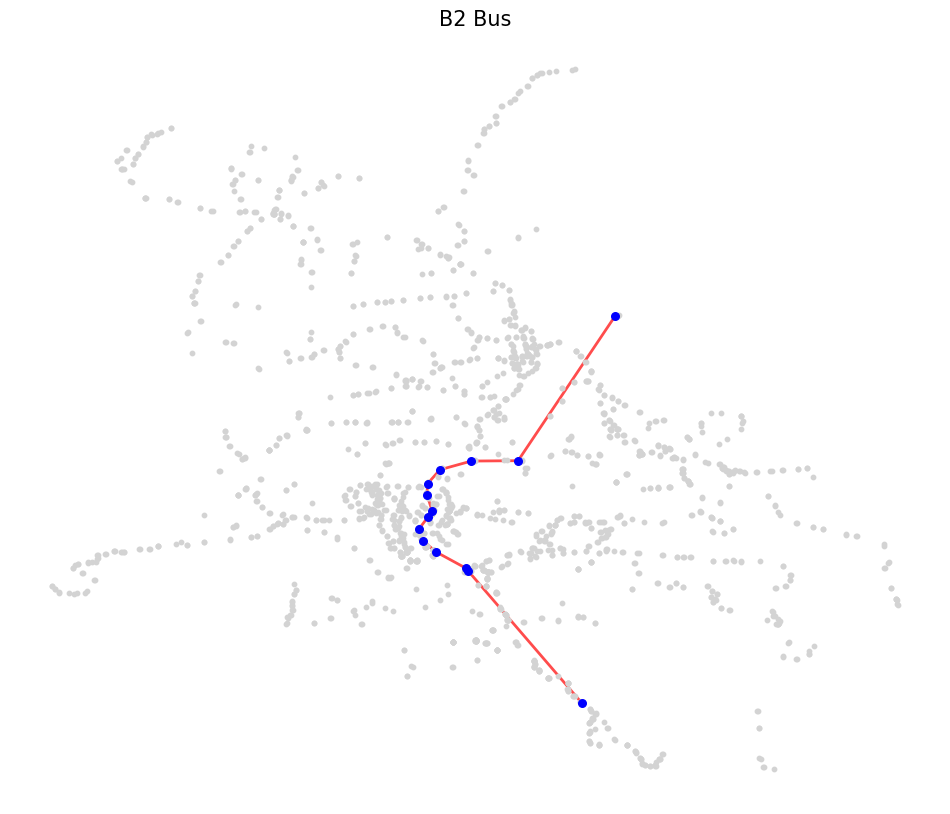

In [12]:
#그래프 시각화
name = 'B2'

if name in route_graphs:
    visualize_route_graph(name, route_graphs[name])